# Logistic Regression

**What does it do?**
It fits a line or polynomial with sigmoid activation minimizing the sum of mean squared error (MSE) between the predicted and actual class labels. The labels are binary class labels. 


Here are all the formulas: 
![Alt text](../images/logistic_regression_formula.png)



## Implementation without sklearn



In [3]:
## Loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [57]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X = (X - X.mean())/X.std()
y = pd.Series(data.target)
print(X.shape, y.shape)

(569, 30) (569,)


In [58]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = X.sample(frac=1, random_state=42)
y = y[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)
train_size = int(0.8 * len(X))  
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [46]:
def sigmoid_f(z): 
    # If you don't break it down like this, you will get lot's of overflow warnings!
    if z >= 0: 
        return 1 / (1 + (np.e ** (-z)))
    else: 
        return (np.e ** z) / (1 + (np.e ** z))

def stable_sigmoid(x):
    return np.array([sigmoid_f(value) for value in x])
    
def cost_function(y, y_pred):
    m = len(y)
    return - (y.T.dot(np.log(y_pred+ 1e-9)) + (1-y).T.dot(np.log(1 - y_pred + 1e-9))) / m

In [60]:
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    """Gradient descent for linear regression"""
    m = len(y)
    X = np.concatenate((np.ones([X.shape[0], 1]), X), axis = 1)  # Shape: (m, n+1)
    theta = np.zeros(X.shape[1])
    cost_history = []
    for i in range(iterations):
        y_pred = stable_sigmoid(X.dot(theta)) 
        cost = cost_function(y, y_pred)
        cost_history.append(cost)
        theta -= (alpha / m) * (X.T.dot(y_pred - y))
    y_pred = stable_sigmoid(X.dot(theta)) 
    cost = cost_function(y, y_pred)
    print(f"Iteration {i}: Cost = {cost:.4f}")
    return theta, cost_history

Iteration 999: Cost = 0.0960


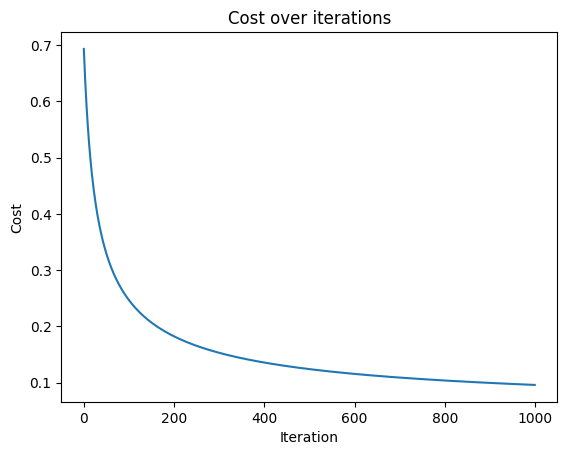

In [61]:
# Run the gradient descent on the dataset
theta, cost_history = gradient_descent(X_train, y_train)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()


In [62]:
from sklearn.metrics import accuracy_score

# Reconstruct X with bias term
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_probs = stable_sigmoid(X_test_with_bias.dot(theta))
y_pred_labels = (y_pred_probs >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred_labels))


Test Accuracy: 0.9649122807017544


## Lessons learned from the implementation 

- ALWAYS make sure to not forget to normalize the features! It really matters!
- The cost function is supposed to decrease monotonically, but because I forgot about data normalization, it had sharp spikes!
- When I used the stable sigmoid implementation, it didn't give me overflow warnings anymore.